In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
%matplotlib inline
#plt.style.use(['fivethirtyeight'])
#mpl.rcParams['lines.linewidth'] = 2



# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


In [2]:
import matplotlib.style as style
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
style.use('seaborn-poster') #sets the size of the charts
style.use('fivethirtyeight')

In [4]:
location = r"C:\Users\madhu\Downloads\Compressed\who-suicide-statistics\who_suicide_statistics.csv"
wh = pd.read_csv(location)

In [5]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [6]:
wh.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [36]:
wh.suicides_no.value_counts()

0.0       5936
1.0       2146
2.0       1489
3.0       1129
4.0        907
          ... 
2494.0       1
1475.0       1
3076.0       1
828.0        1
2628.0       1
Name: suicides_no, Length: 2231, dtype: int64

In [7]:
wh.dropna(inplace=True)

In [8]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
country        36060 non-null object
year           36060 non-null int64
sex            36060 non-null object
age            36060 non-null object
suicides_no    36060 non-null float64
population     36060 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [9]:
wh.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0


In [10]:
wh.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0


In [11]:
wh[wh.year==1995]['suicides_no'].value_counts().sort_index()

0.0        145
1.0         59
2.0         32
3.0         24
4.0         32
          ... 
5733.0       1
8545.0       1
9787.0       1
11152.0      1
21706.0      1
Name: suicides_no, Length: 330, dtype: int64

In [12]:
wh.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [13]:
wh.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,36060,118,Hungary,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,36060,NaN,NaN,NaN,1998.94,10.1639,1979,1991,2000,2008,2016
sex,36060,2,female,18030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,36060,6,55-74 years,6010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,36060,NaN,NaN,NaN,221.81,855.449,0,2,21,116,22338
population,36060,NaN,NaN,NaN,1.7e+06,3.69781e+06,259,80566,375765,1.3449e+06,4.38052e+07


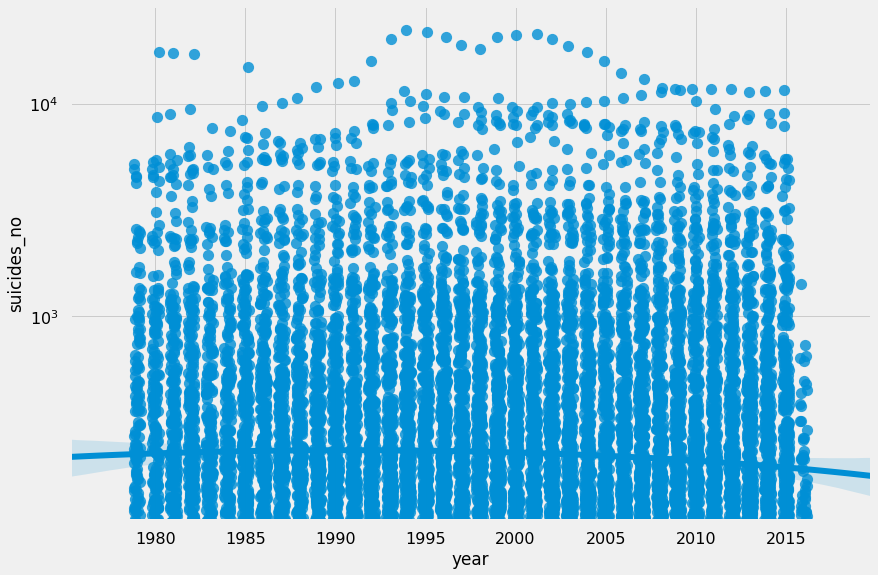

In [14]:
#sns.set(rc={'figure.figsize':(12,7)})
#sns.set(style='whitegrid')
ax = sns.regplot(data=wh, x='year',y='suicides_no', x_jitter=0.2, order=2)
ax.set_yscale('log')

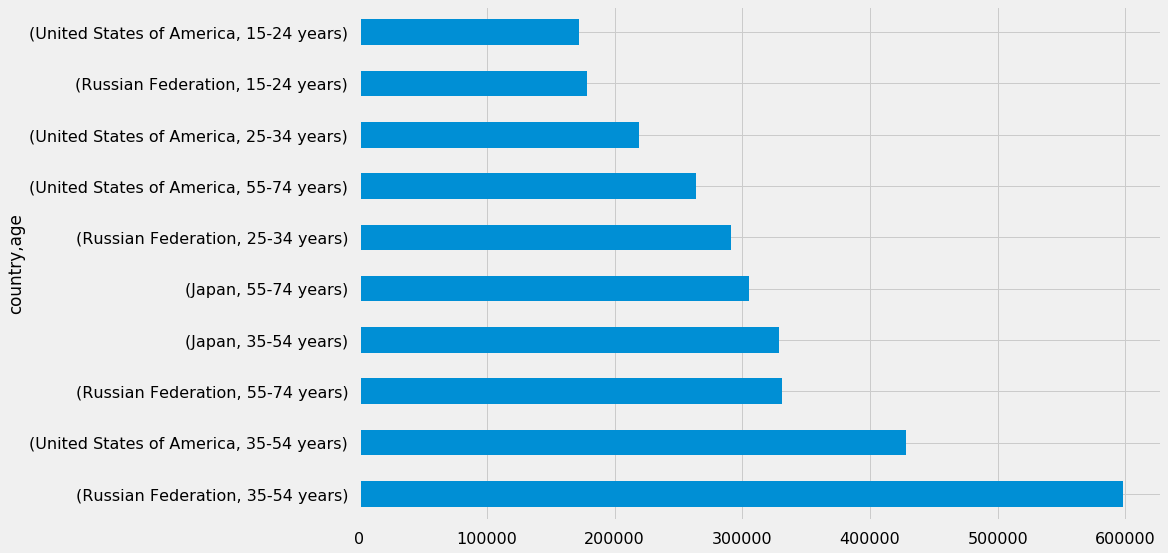

In [15]:
#sns.set(rc={'figure.figsize':(8,8)})
#sns.set(style='whitegrid')
ax = wh.groupby(['country', 'age']).suicides_no.sum().nlargest(10).plot(kind='barh')

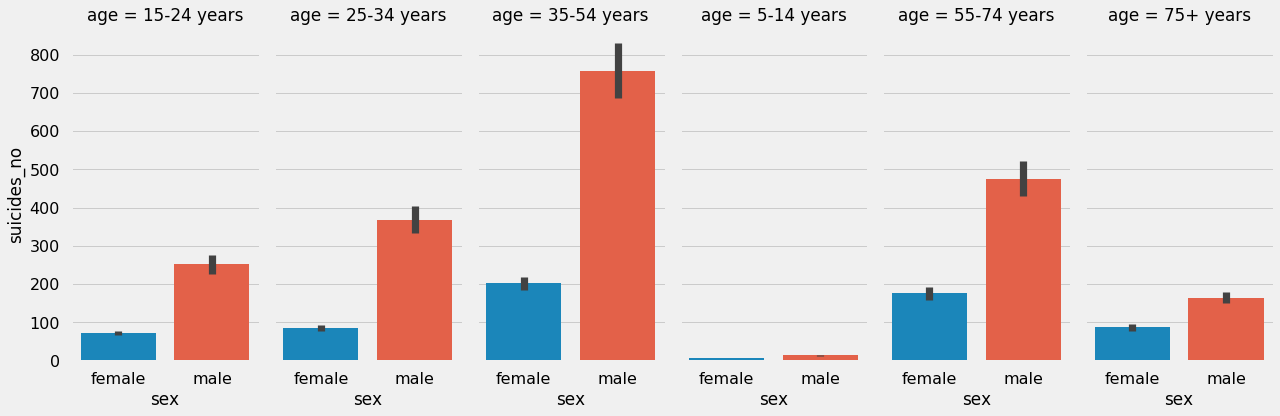

In [16]:
from numpy import median
#sns.set(rc={'figure.figsize':(16,6)})
#sns.set(style='whitegrid')
ax = sns.catplot(x='sex', y='suicides_no',col='age', data=wh, height=6, aspect=0.5, kind='bar')

In [17]:
# Convert age (object) to CategoricL variable
wh['age'] = wh.age.astype(pd.api.types.CategoricalDtype(categories=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))

In [18]:
wh.dtypes

country          object
year              int64
sex              object
age            category
suicides_no     float64
population      float64
dtype: object

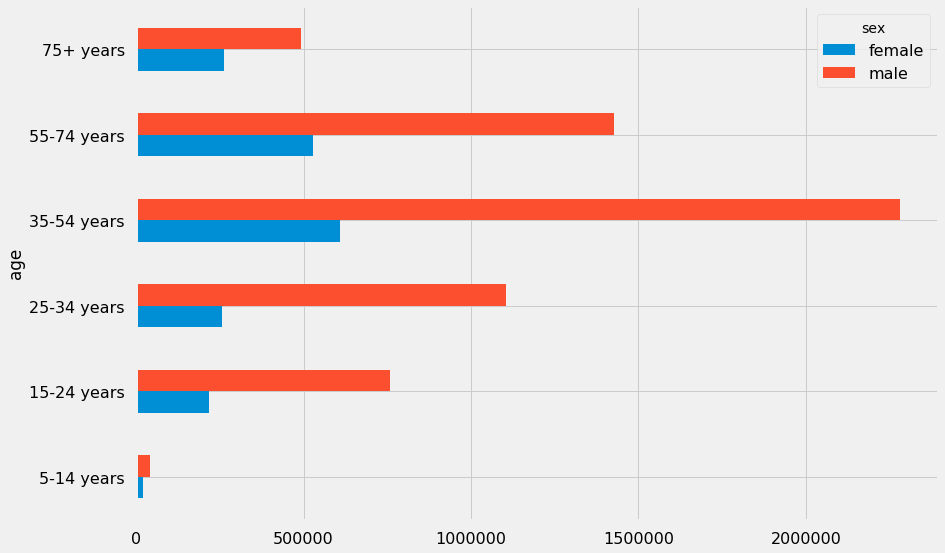

In [19]:
wh.pivot_table(index='age',columns='sex', values='suicides_no', aggfunc='sum').plot(kind='barh')

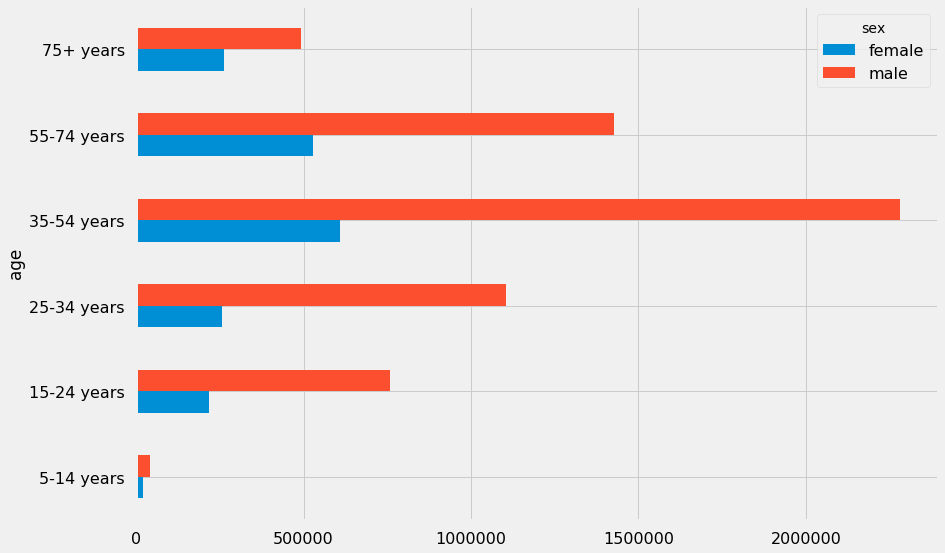

In [20]:
wh.groupby(['age', 'sex']).suicides_no.sum().unstack().plot(kind='barh')

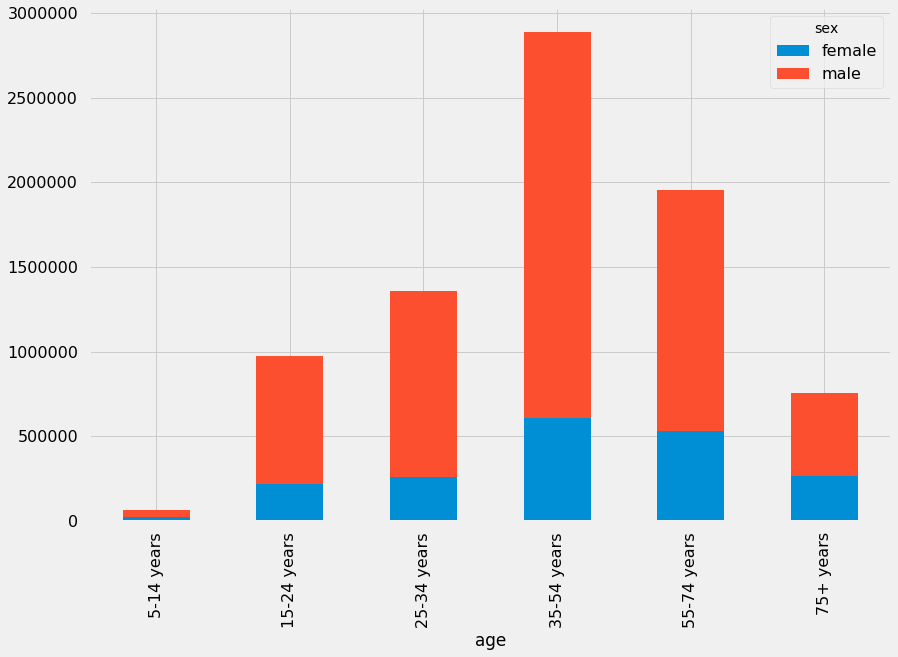

In [21]:
wh.groupby(['age', 'sex']).suicides_no.sum().unstack().plot(kind='bar', stacked=True)

In [22]:
wh.groupby(['age', 'sex']).suicides_no.sum().unstack().reset_index().melt(id_vars='age')

,age,sex,value
0,5-14 years,female,20152.0
1,15-24 years,female,218309.0
2,25-34 years,female,256427.0
3,35-54 years,female,607420.0
4,55-74 years,female,528359.0
5,75+ years,female,263627.0
6,5-14 years,male,42168.0
7,15-24 years,male,757391.0
8,25-34 years,male,1104353.0
9,35-54 years,male,2280320.0


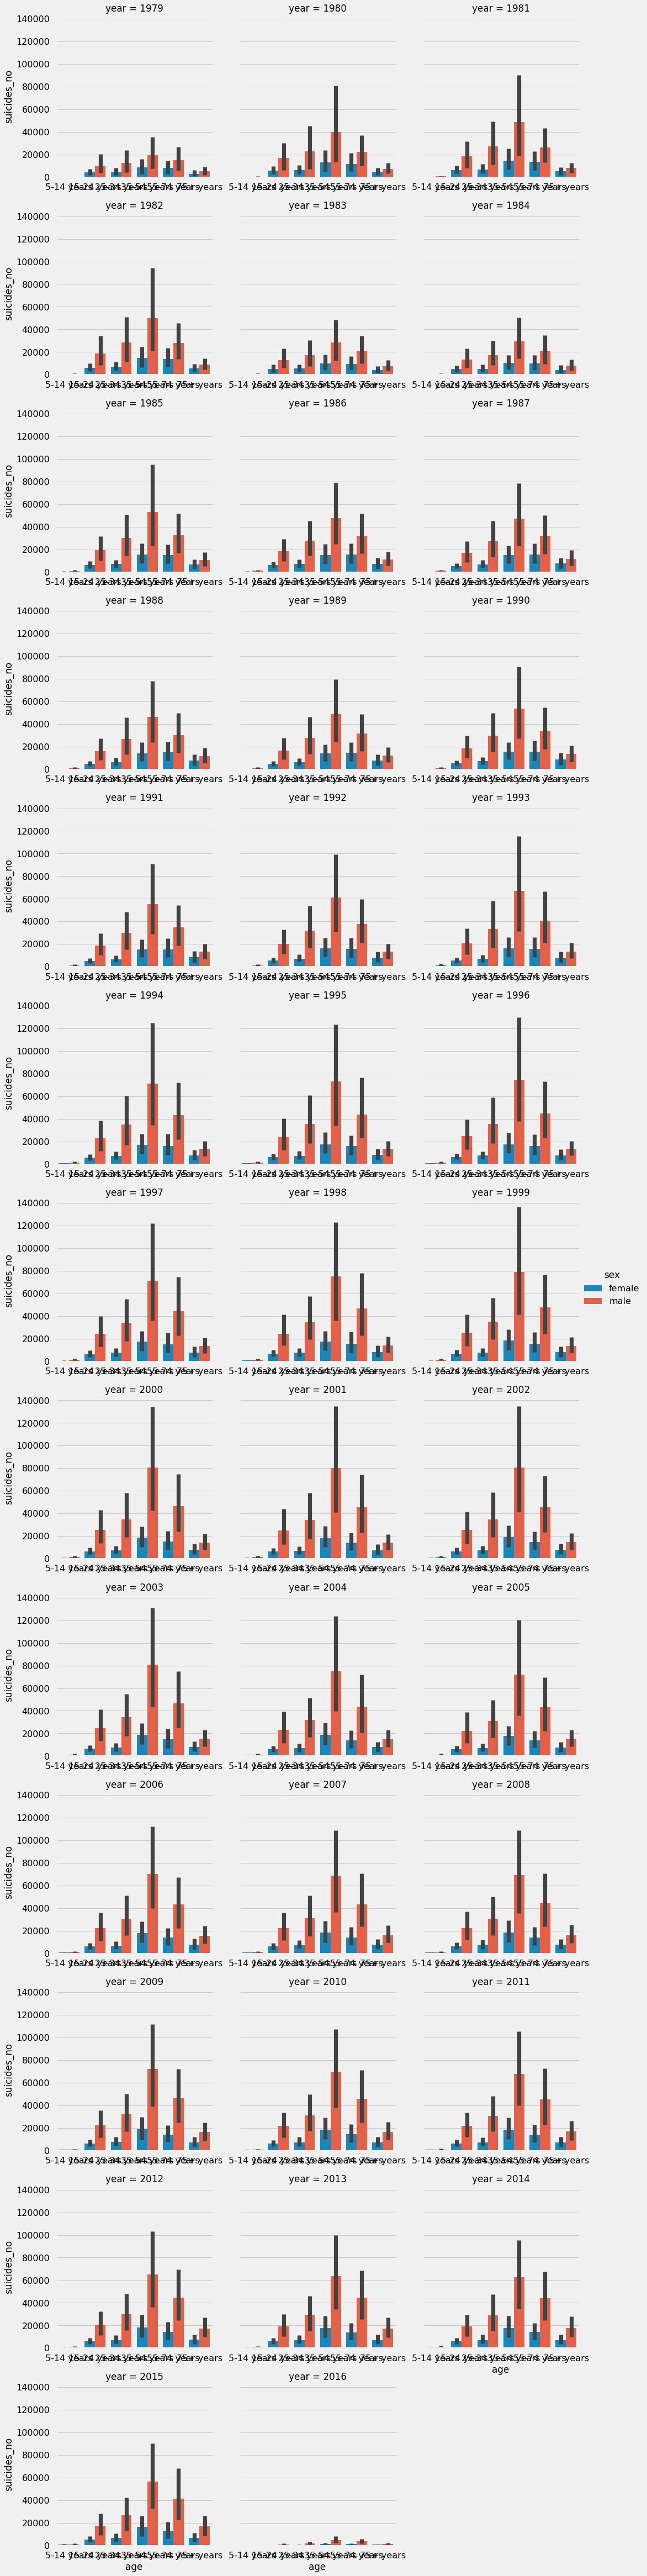

In [23]:
from numpy import sum
sns.catplot(x='age', y='suicides_no', data=wh, kind='bar', col='year', col_wrap=3, estimator=sum, sharex=False, hue='sex')

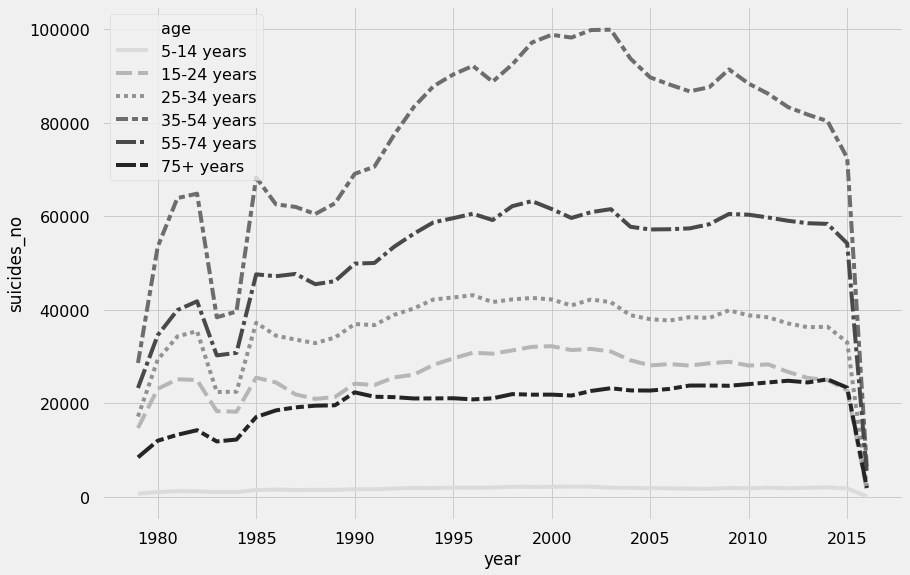

In [24]:
from matplotlib.colors import LogNorm
df = wh.groupby(['year', 'age']).suicides_no.sum().reset_index()
sns.lineplot('year', 'suicides_no', data=df, hue='age',style='age', hue_norm=LogNorm(), palette='gist_gray_r')

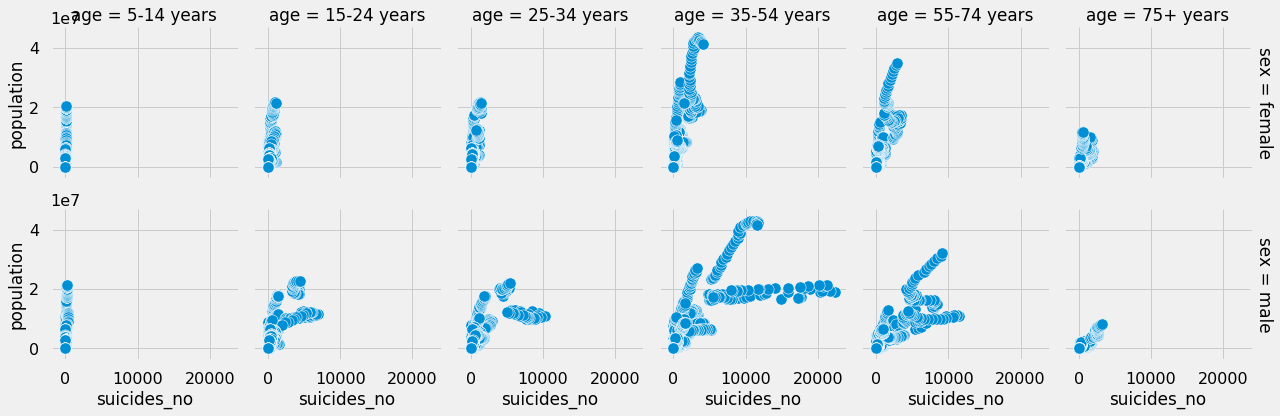

In [25]:
g = sns.FacetGrid(wh, row='sex', col='age', margin_titles=True)
g.map(plt.scatter, 'suicides_no', 'population', edgecolor='w')

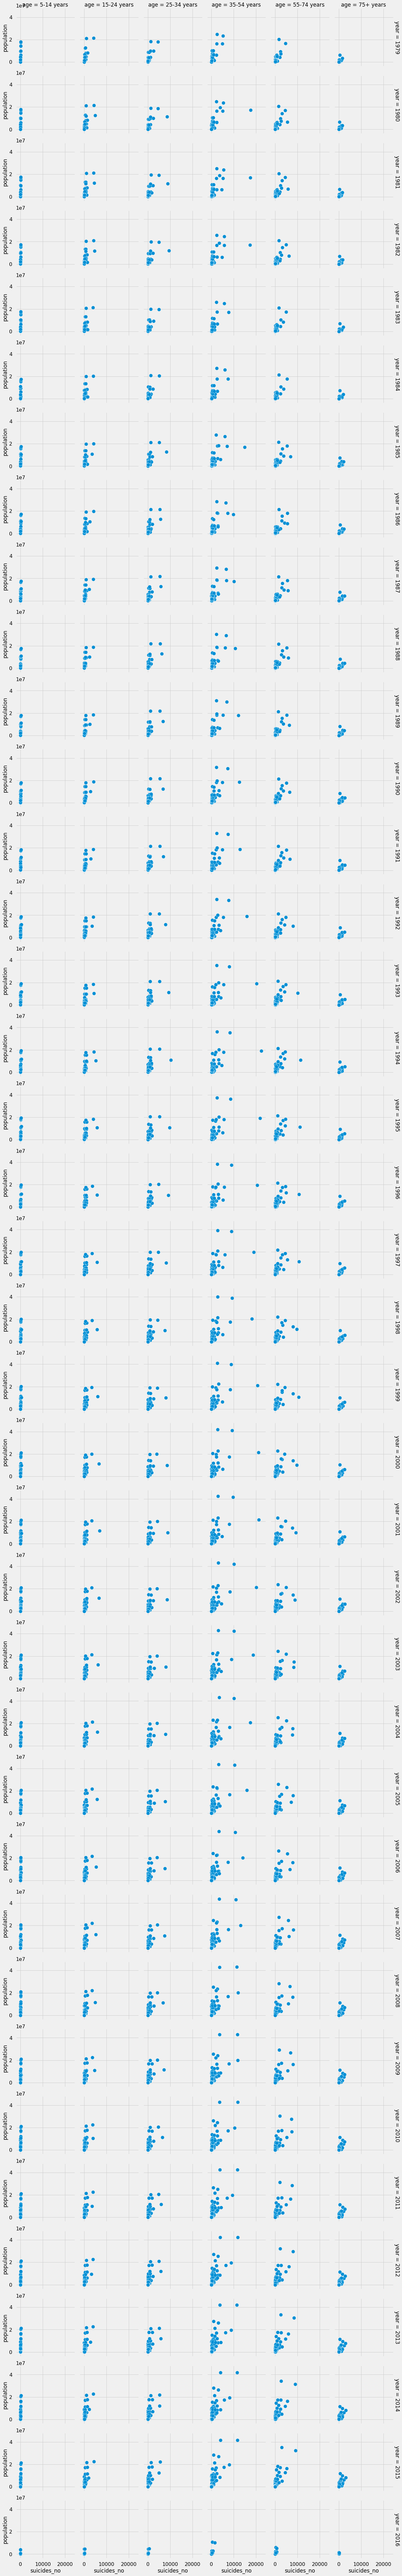

In [26]:
g = sns.FacetGrid(wh, row='year', col='age', margin_titles=True)
g.map(plt.scatter, 'suicides_no', 'population', edgecolor='w')

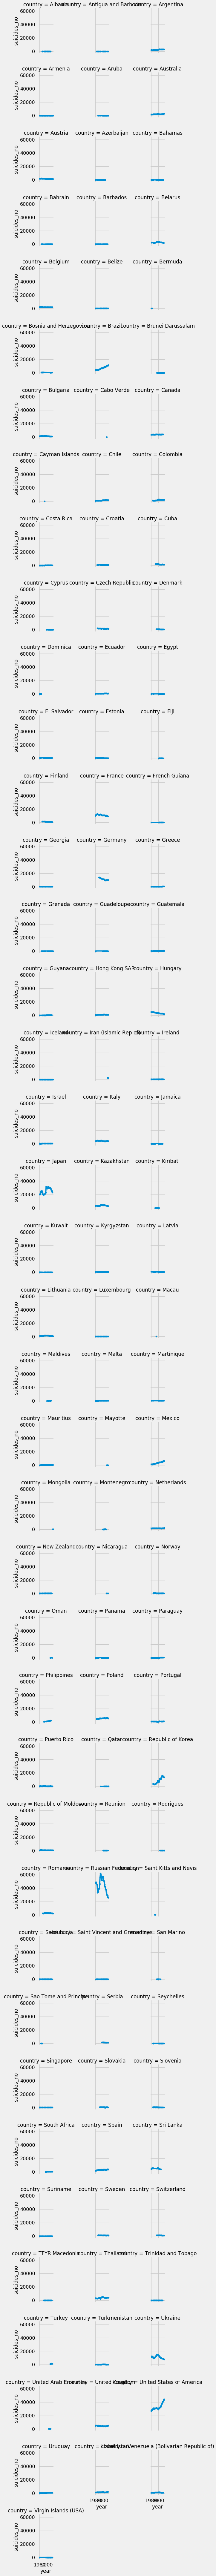

In [31]:
g = sns.FacetGrid(wh.groupby(['country', 'year']).suicides_no.sum().reset_index(), col='country', col_wrap=3, margin_titles=True)
g.map(plt.plot, 'year', 'suicides_no', marker='.')

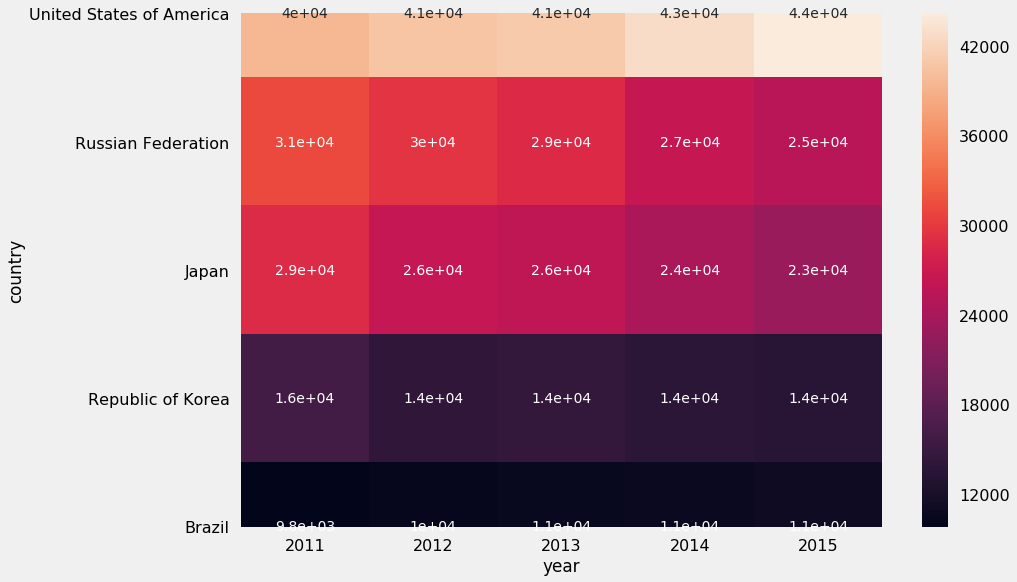

In [34]:
p = pd.crosstab(index=wh.country, columns=wh.year, values=wh.suicides_no, aggfunc='sum')
sns.heatmap(p.loc[:,2011:2015].sort_values(2015, ascending=False).dropna().head(5), annot=True)

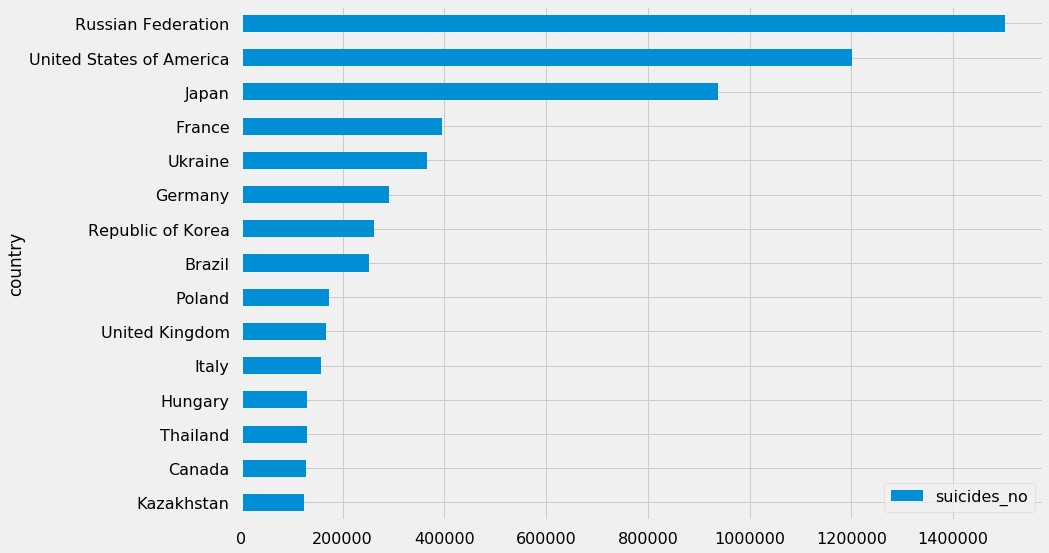

In [49]:
wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'], ascending=True).tail(15).plot(y='suicides_no', x='country', kind='barh')

In [51]:
location1 = r"C:\Users\madhu\Downloads\Compressed\world-happiness\2015.csv"
happiness = pd.read_csv(location1)

In [52]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [53]:
happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

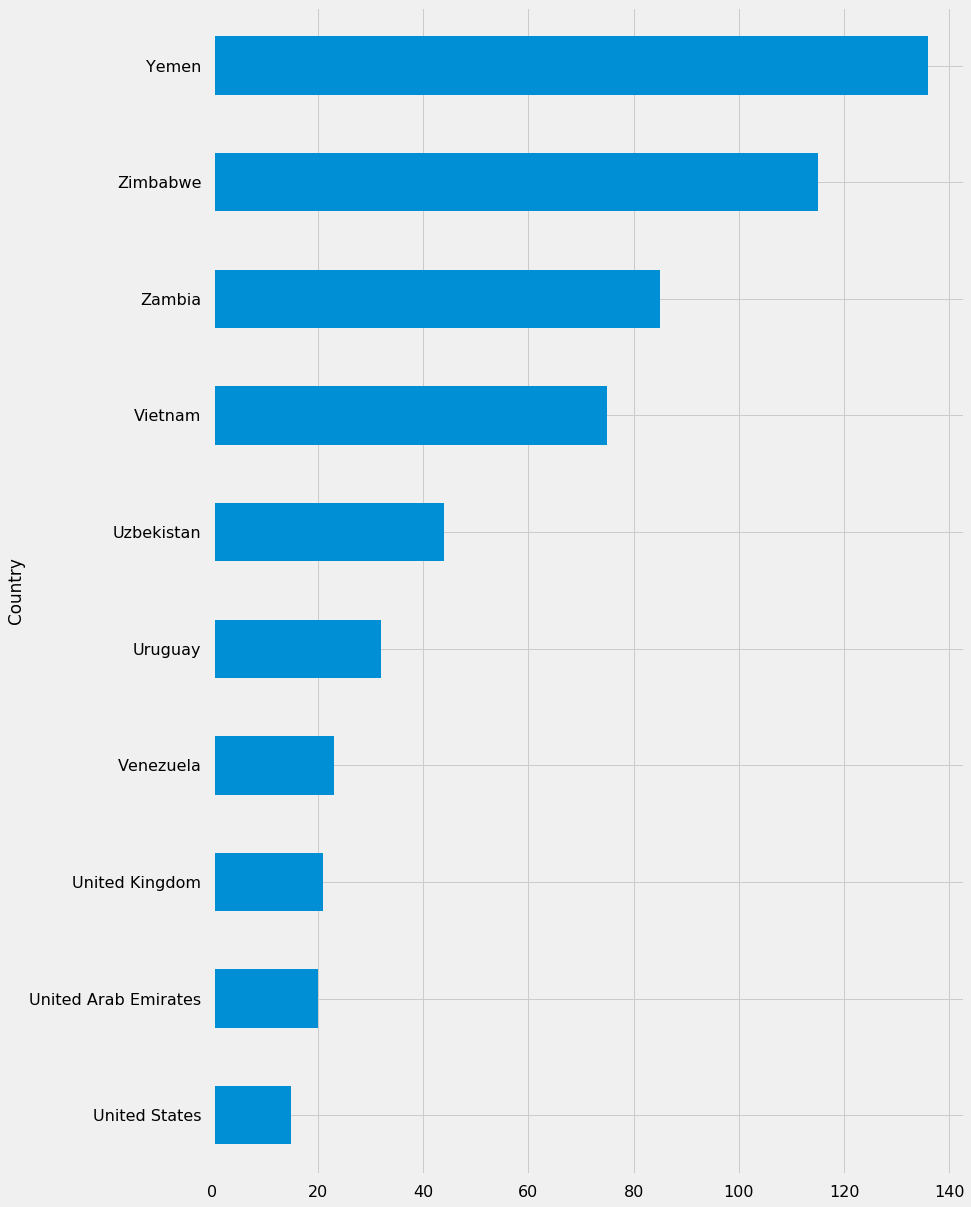

In [71]:
happiness.groupby(['Country'])['Happiness Rank'].max().tail(10).sort_values().plot(kind='barh', x='Country', y='Happiness Rank', figsize=(12,20))

In [62]:
happiness[happiness.Country.str.contains('Russia')]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
63,Russia,Central and Eastern Europe,64,5.716,0.03135,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199,2.27394


In [63]:
countries = ['Russia','United States','Japan','France','Ukraine','Germany','South Korea',
'Brazil','Poland','United Kingdom','Italy','Hungary','Thailand','Canada','Kazakhstan']

In [64]:
happiness_dr = happiness[happiness.Country.isin(countries)]

In [66]:
happiness_dr = happiness_dr.drop('Region', axis=1).set_index('Country')

In [67]:
happiness_dr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,
Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
United States,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
Brazil,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001
United Kingdom,21,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994
Germany,26,6.750,0.01848,1.32792,1.29937,0.89186,0.61477,0.21843,0.28214,2.11569
France,29,6.575,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126
Thailand,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
Japan,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
South Korea,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978


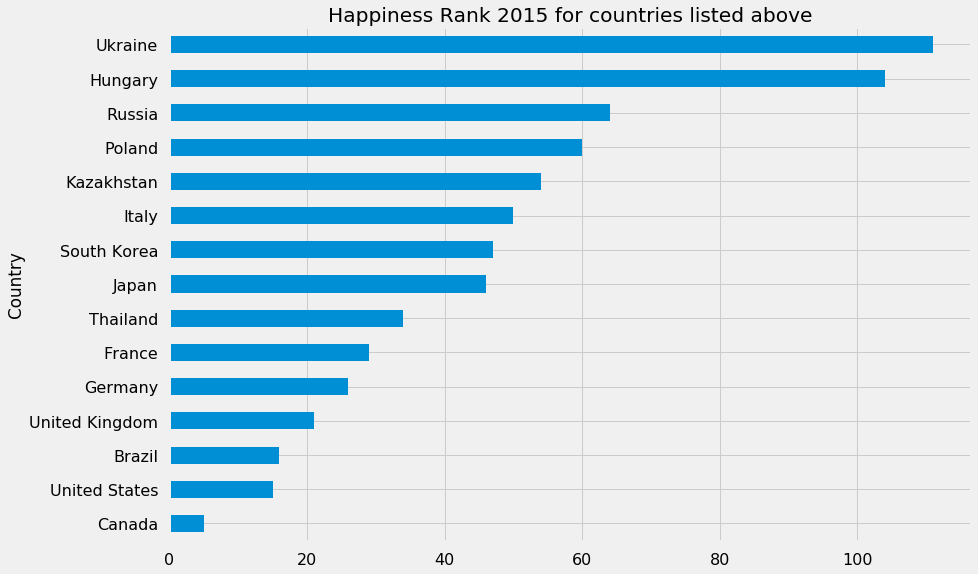

In [70]:
happiness_dr['Happiness Rank'].plot(kind='barh', title='Happiness Rank 2015 for countries listed above')

In [72]:
happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


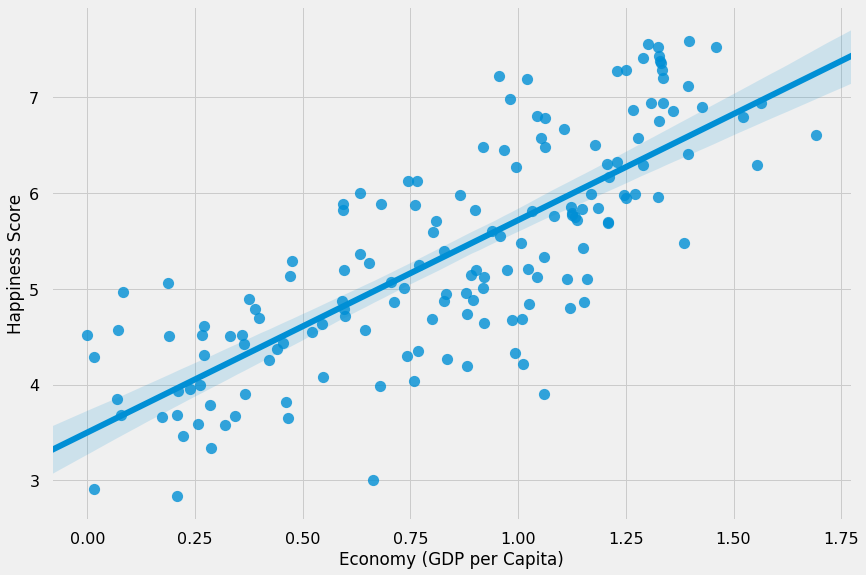

In [74]:
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=happiness)

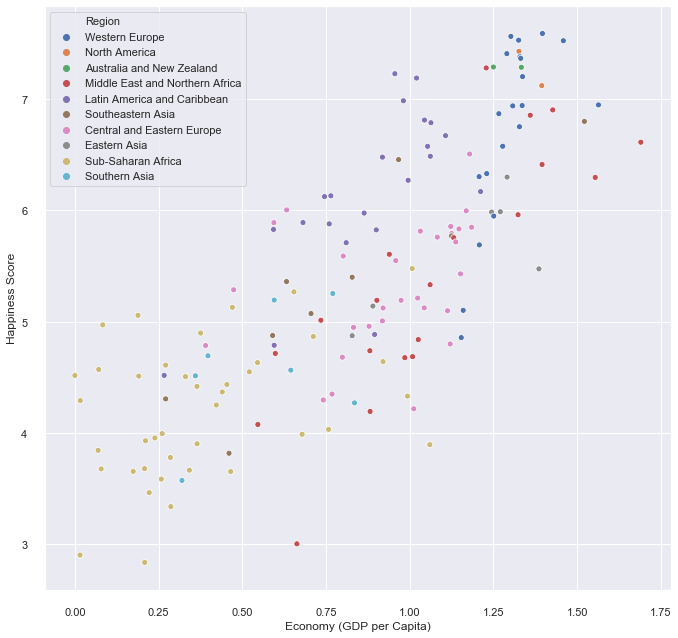

In [78]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=happiness, hue='Region')

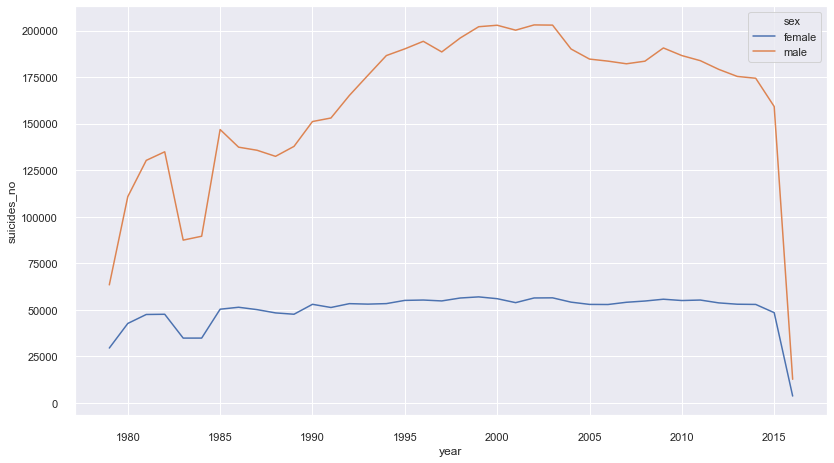

In [88]:
sns.set(rc={'figure.figsize':(12,7)})

sns.lineplot(x='year', y='suicides_no', data=wh.groupby(['year','sex'])['suicides_no'].sum().reset_index(), hue='sex')

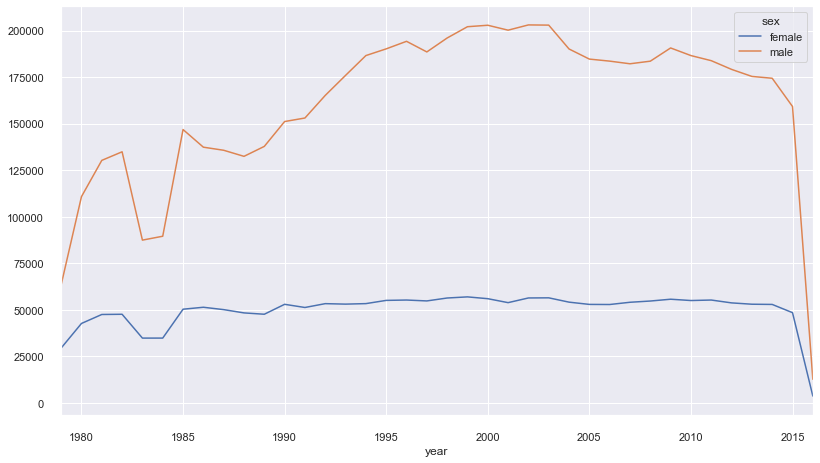

In [91]:
wh.pivot_table(index='year', columns='sex', values='suicides_no', aggfunc='sum').plot()

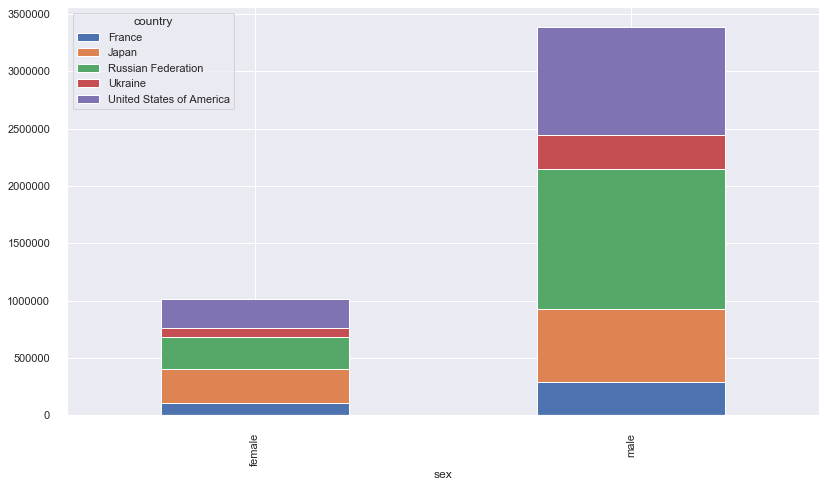

In [94]:
wh[wh.country.isin(wh.groupby(['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'], ascending=True).tail(5).country)].groupby(['sex', 'country'])['suicides_no'].sum().unstack().plot(kind='bar', stacked='True')